In [ ]:
#@title Run this to prepare our environment


# Imports the required libraries
import cv2
import dlib
import math
import unittest
import numpy as np
import urllib.request

from scipy.spatial import distance
from matplotlib import pyplot as plt

###Getting the Dlib Shape predictor!
!wget -O ./shape_predictor_68_face_landmarks.dat "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat"
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'

print ("Done")

--2021-07-08 01:06:45--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘./shape_predictor_68_face_landmarks.dat’

./shape_predictor_6 100%[===================>]  95.08M   105MB/s    in 0.9s    

2021-07-08 01:06:46 (105 MB/s) - ‘./shape_predictor_68_face_landmarks.dat’ saved [99693937/99693937]

Done


In [ ]:
#@title If the previous code cell fails to download the data properly, please run this.
import cv2
import dlib
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
from sklearn import metrics
from scipy.spatial import distance
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import io
# ?pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
# warnings.filterwarnings("ignore")

%pip install googledrivedownloader
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1hNLedQCRl8uutOwtXWxBmiW3x7bckj4u',
#                                     dest_path='./ferdata.csv', overwrite=True,showsize=True)
#Getting the csv data loaded
!wget -O ./ferdata.csv 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/fer2013_5.csv'

###Getting the Dlib Shape predictor!
!wget -O ./shape_predictor_68_face_landmarks.dat 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat'

###Getting the Xpure loaded
!wget ./pureX.npy 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/pureX.npy'

###Getting the Xdata loaded
!wget ./dataX.npy 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/dataX.npy'

###Getting the Ydata loaded
!wget ./dataY.npy 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/dataY.npy'

print ("Data Downloaded!")

--2021-07-08 01:06:51--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/fer2013_5.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167738172 (160M) [text/csv]
Saving to: ‘./ferdata.csv’

./ferdata.csv       100%[===================>] 159.97M   140MB/s    in 1.1s    

2021-07-08 01:06:52 (140 MB/s) - ‘./ferdata.csv’ saved [167738172/167738172]

--2021-07-08 01:06:52--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.213.128, ...
Connectin

# Emotion Detection

Have you ever been in a situation where you signed up for an online course, however, after attending couple of sessions, you dropped out of the course?
According to facts, more than 70 % people enrolled in online courses tend to dropout. Why is it so? Well, there could be multiple reasons to this such as the unadaptable teaching style, quality and the difficulty of the teaching content, etc.

However, if a feedback system which could predict the emotion of the student as to if they were delighted, frustrated or confused was incorporated, wouldn't it make learning better?

Well, of course it would! Imagine a scenario where confusion was seen as prominent emotion within the class. What it could possibly imply is that students either didn't understand the content or couldn't adhere to tutor's teaching style. This kind of feedback can be taken into account so that the upcoming sessions could be suited better to the needs of the students.

Emotion Detection has a wide variety of applications. Smart cars with facial emotion detection technology can help understand if the driver is feeling drowsy and send driver personalized alerts to stop for a coffee break or change the music, etc.

Companies are also using emotion detection during the Video Game Testing phase. It helps them understand which emotions are experienced at what points in the game. Taking written feedback from the user who has experienced the game can be inefficient. This is because it can often be difficult to put an experience into words. 

Facial Emotion detection is a practical means of going beyond the spoken or written feedback and appreciating what the user is experiencing. Such is more reliable than other forms of feedback.


![Demo](https://media.gettyimages.com/photos/facial-recognition-of-caucasian-businessman-picture-id905553688?k=6&m=905553688&s=612x612&w=0&h=05pKk6IgZ8SGLOGWdKIkcVz4toQEThSV40TguY5xAh8=)

You and your group are going to build an AI tool that can help predict the emotions based on the Facial Expressions. 

You will classify the facial expressions into one of the following core emotions: **Anger, Happy, Sad, Surprise, Neutral**





In this notebook we'll be:
1.   Understanding Face Detection
2.   Understanding Facial Landmarks
2.   Understanding Euclidean Distances
2.   Understanding Emotion Detection



## Exercise 1 (5 Minutes) | Discussion: How should we set up this problem

- What "features" might be useful in recognizing emotion? 
- What steps would you take to identify and use these features for emotion recognition? 
- How would you set up this problem using the tools we've learned in this course? 
- What are some applications for this machine learning approach to emotion recognition?
- What might be missing from this approach?

#Milestone 1: Understanding Face Detection

**What is Face Detection?**

Face detection is a computer vision technology that helps to locate human faces in images. This technique is a specific use case of object detection technology that deals with detecting instances of semantic objects of a certain class (such as humans, buildings or cars) in images and videos

 

![](https://cdn.xl.thumbs.canstockphoto.com/happy-woman-with-umbrella-walking-in-autumn-park-season-weather-and-people-concept-beautiful-stock-photo_csp40883320.jpg)

## Exercise 2 (Discussion) | 5 minutes 

- What emotion is depicted in the image above? 
- Which part of the image helped you predict the emotion?
- What steps did you take to recognize this emotion?

You can visit [this site](https://imotions.com/blog/facial-action-coding-system) to look at how human facial expressions have been segmented into groups. 

##Face Detection Demonstration



Face Detection is an important step in the emotion classification pipeline. It helps us eliminate parts of the image which have no relevance in detecting the emotion

Face detection algorithms are used to predict the bounding box co-ordinates of the face

![](https://drive.google.com/uc?export=view&id=1ZE-3eN2sarQ0h9kusTO5hosWLi2S4mlw)

Dlib is a popular Python library complied in C++. For this project we will use
Dlib's pre-trained Face detection model to extract the bounding box co-ordinates of the face


###Load Pretrained Dlib model

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()

In [ ]:
#@title Run this cell to define a helper Function for Face Detection

'''
  Converts dlib rectangular object to bounding box co-ordinates
'''
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)


In [ ]:
#@title Run this cell to define a helper Function for Face Detection with a given image

"""
Detects the face in the given image
"""
def detect_face(image_url):
  """
  :type image_url: str
  :rtype: None
  
  """
  try:
    
    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    
  except Exception as e:
    return "Please check the URL and try again!"
    
  #Detect faces using dlib model
  rects = frontalface_detector(image, 1)
  
  if len(rects) < 1:
    return "No Face Detected"
  
  # Loop over the face detections
  for (i, rect) in enumerate(rects):
    # Converts dlib rectangular object to bounding box co-ordinates
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.show()
  

### Face Detection

###Try it Out!!!

Enter the URL of the image: https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg


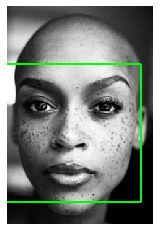

In [ ]:
# https://www.clickinmoms.com/blog/wp-content/uploads/2014/10/black-and-white-portrait-of-man-with-his-eyes-closed-by-Brian-Powers.jpg
# https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg
# https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg

# Give the path of the image for face detection
detect_face(input('Enter the URL of the image: '));

#Milestone 2: Understanding Facial Landmarks

**What are Facial Landmarks?**


Facial landmarks are a set of key points on human face images/Facial Landmarks represent the points of interest within the face. The points are defined by their (x,y) coordinates on the image. These points are used to locate and represent salient regions of the face, such as eyes, eyebrows, nose, mouth and jawline.

##Facial Landmark Demonstration

Facial Landmark estimation is an important feature extraction steps in solving variety of applications such as face recognition, facial expression recognition, face swapping, face filters and much more. 

The number of Facial key points on the face can be variable depending on the pre-trained facial landmark model being used.



![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3TMlMcOORwi88JUPO3xvHbjl8yBGDZnMMNhfpY5pS4Mvq_n7w)

For this project, we will be using Dlib's pretrained Facial Landmark Detection Model which help us detect 68 2-Dimensional points on the human face



## Facial Landmark Estimation using DLib

In this section, we are going to look at the code to extract and plot the 68 Facial Landmarks for the given image.



###Load Pre-trained DLib models

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()
#Load the 68 face Landmark file
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

### Extracting Facial Landmarks

In [ ]:
#@title Run this cell to define a helper function for Face Detection from a url


"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image_url):
  """
  :type image_url : str
  :rtype image : cv2 object
  :rtype landmarks : list of tuples where each tuple represents 
                     the x and y co-ordinates of facial keypoints
  """
  
  try:
    
    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    
  except Exception as e:
    print ("Please check the URL and try again!")
    return None,None
  
  #Detect the Faces within the image
  faces = frontalface_detector(image, 1)
  if len(faces):
    landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  else:
    return None,None
  
  return image,landmarks

###Visualizing Facial Landmarks

In [ ]:
#@title Run this cell to define a helper function to visualize landmarks

"""
Display image with its Facial Landmarks
"""
def image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents 
                     the x and y co-ordinates of facial keypoints
  :rtype : None
  """
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)
    
  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()
  

###Try it Out!!!!

Enter the URL of the image: https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg


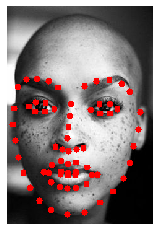

In [ ]:
#Extract the Facial Landmark co-ordinates
image,landmarks= get_landmarks(input("Enter the URL of the image: ")) #url

#Plot the Facial Landmarks on the face
if landmarks:
  image_landmarks(image,landmarks)
else:
  print ("No Landmarks Detected")

In [ ]:
#@title Run (and eventually edit) this cell to visualize the features we've extracted

def show_indices(landmarks, i_index): 
  
  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2, len(landmarks))], 
              y=[-landmarks[i][1] for i in range(len(landmarks)//2, len(landmarks))], s=50, alpha=.5, color='blue', label='second half of indices') 

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2)], 
              y=[-landmarks[i][1] for i in range(len(landmarks)//2)], color='red', alpha=.5, label='first half of indices')

  # what should X and Y be to visualize the feature at i_index? 
  x = landmarks[i_index][0]
  y = -landmarks[i_index][1]
  plt.scatter(x=x, y=y, 
             color='purple', s=100, marker='x', label='feature at index %d'%i_index)


  plt.scatter(x, y, color='red', alpha=.5, label='selected indices')

  plt.axis('off');
  plt.legend(bbox_to_anchor=[1,1])
  plt.title('Visualizing the features we\'ve extracted from this image',y =1.2)

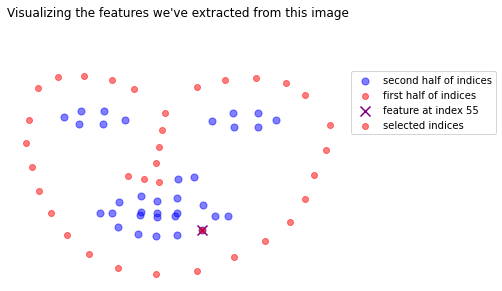

In [ ]:
show_index = 55
#(49, 59) (50, 58) (51, 57) (52, 56) (53, 55)
show_indices(landmarks, show_index)

## Exercise 2B (Discussion) | 10 Minutes | Within a student group



In [ ]:
#@title Which Facial Landmark points correspond to which part of the face? { display-mode: "form" }
LeftEye= "36-41" #@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 
RightEye = "42-47"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"]  
Eyebrows = "17-26"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 
Nose = "27-35"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 
Mouth = "48-67"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 
Jawline = "0-16"#@param["0-16", "17-26", "27-35","36-41","42-47","48-67","Fill Me In"] 




if LeftEye == "36-41": 
  print("The Left eye can be accessed through points %s"%LeftEye) 
else: 
  print('Not quite %s'%LeftEye)
  
if RightEye == "42-47": 
  print("The Right eye can be accessed through points %s"%RightEye) 
else: 
  print('Not quite %s'%RightEye)
  
if Eyebrows == "17-26": 
  print("The Eyebrows can be accessed through points %s"%Eyebrows) 
else: 
  print('Not quite %s'%Eyebrows)
  
if Nose == "27-35": 
  print("The Nose can be accessed through points %s"%Nose) 
else: 
  print('Not quite %s'%Nose)

if Mouth == "48-67": 
  print("The Mouth can be accessed through points %s"%Mouth) 
else: 
  print('Not quite %s'%Mouth)
  
if Jawline == "0-16": 
  print("The Jawline can be accessed through points %s"%Jawline) 
else: 
  print('Not quite %s'%Jawline)



The Left eye can be accessed through points 36-41
The Right eye can be accessed through points 42-47
The Eyebrows can be accessed through points 17-26
The Nose can be accessed through points 27-35
The Mouth can be accessed through points 48-67
The Jawline can be accessed through points 0-16


## Exercise 2C (Coding) 

In this section, you will modify the inputs to `image_landmarks`  function defined in previous section to detect and display different parts of the face individually using Facial landmarks.

Write code to detect eyes, nose, mouth, jawline and eyebrows using Facial Landmarks.

Hint: To detect the eyes, you need to plot Facial Landmark points from 36-47

Note: Make sure you have valid facial landmark output after running the previous block (Try it Out Section!)

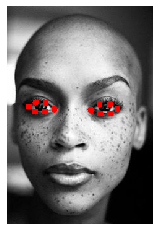

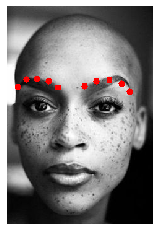

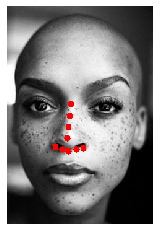

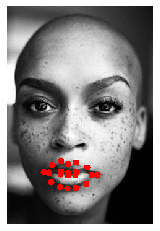

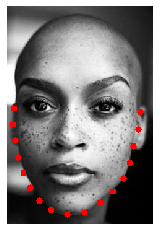

In [ ]:
# Display images with individual detection of face parts 

# For example, for eye detection

eye_points = (36,47)
selected_landmarks = landmarks[eye_points[0]:eye_points[1]+1]
image_landmarks(image,selected_landmarks)

### YOUR CODE HERE
eyebrow_points = (17,26)
selected_landmarks = landmarks[eyebrow_points[0]:eyebrow_points[1]+1]
image_landmarks(image,selected_landmarks)

nose_points = (27,35)
selected_landmarks = landmarks[nose_points[0]:nose_points[1]+1]
image_landmarks(image,selected_landmarks)

mouth_points = (48,67)
selected_landmarks = landmarks[mouth_points[0]:mouth_points[1]+1]
image_landmarks(image,selected_landmarks)

jawline_points = (0,16)
selected_landmarks = landmarks[jawline_points[0]:jawline_points[1]+1]
image_landmarks(image,selected_landmarks)

### END CODE

#Milestone 3: Understanding Euclidean Distances




Euclidean distance between between points p and q is is equal to the length of the line segment connecting them. When data is dense or continuous, this is the best proximity measure. 

In this section, we will explore how euclidean distance between pairs of Facial Landmarks can help solve simple use cases related to faces

##Exercise 3A (Discussion) | 5 Minutes | Within a student group

![](https://drive.google.com/uc?export=view&id=1UTtJOQRh6ebj86SIPr-WfdRgDS2nb3m_)


###What is the difference between two images? Can you use facial landmarks  to distinguish between the two images?

Take a look at the images with facial landmarks superimposed over them!

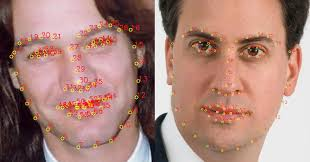

Does the distance between certain facial landmarks help us distinguish between two images?

##Exercise 3B (Coding) | Are the eyes open or close ?

In last block, we figured out which set of landmarks help us distinguish between the two images. In this section, you will write code to distinguish between closed eyes and open eyes using facial Landmarks



###Euclidean Distance

Write a function to compute the euclidean distance between two points

In [ ]:
"""
Computes the euclidean distance between 2 points in 2D space
#inexing#math.sqrt
"""
def euclidean_distance(p1,p2):
  """
  type p1, p2 : tuple
  rtype distance: float
  """
  ### YOUR CODE HERE
  return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
  ### END CODE
  

### Are there other distance metrics we can use here? 

###Classify images based on eyes

Write code to find out which image corresponds to closed eyes and which image corresponds to open eyes using the concept of euclidean distance



###Psuedo-Algorithm

1. Identity the Facial Landmarks of Interest
2. Compute the distances between the points of interest
3. Compare the distances of both the images


In [ ]:
"""
Distinguishes between two images--->closed eyes v/s open eyes 
"""
def classify_images(image1_path,image2_path,plt_flag):
  """
  type image1_path,image2_path: str
  type plt_flag: boolean #Displays input images if True 
  rtype : str
  """
  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)
  
  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()
  ### YOUR CODE HERE

  pairs_distance = [(37,41),(38,40),(43,47),(44,46)]
    
  e_sum1 = 0
  e_sum2 = 0
  threshold_value = 10

  for pair in pairs_distance:
    
    e_sum1 = e_sum1 + euclidean_distance(image1_landmarks[pair[0]],
                                        image1_landmarks[pair[1]])
    e_sum2 = e_sum2 + euclidean_distance(image2_landmarks[pair[0]],
                                        image2_landmarks[pair[1]])
  
  e_difference = e_sum1 - e_sum2

  if int(e_difference) == 0:
    return ("Both images have eyes open or closed")
  
  if abs(e_difference) >= threshold_value:
    
    if e_difference > 0:
        return ("Image1 : Eyes Open, Image2 : Eyes Close")
    else:
        return ("Image1 : Eyes Close, Image2 : Eyes Open")

  


  ### END CODE

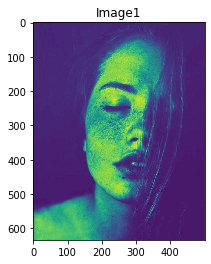

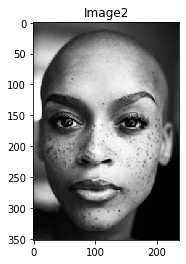

'Image1 : Eyes Open, Image2 : Eyes Close'

In [ ]:
image1_path = "https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg"
image2_path = "https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg"

#https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg


#https://www.clickinmoms.com/blog/wp-content/uploads/2014/10/black-and-white-portrait-of-man-with-his-eyes-closed-by-Brian-Powers.jpg
classify_images(image1_path, image2_path, True)

### Exercise 3C (Discussion) | 5 Minutes | Within a student group

###Take a look at the images below! Do you think our logic would work for all the image sets?

<div id="horizontal">

<img src="https://cdn.pixabay.com/photo/2020/02/04/21/31/luck-4819408_1280.jpg" width=200 height=300></img>

<img src="https://media-gadventures.global.ssl.fastly.net/media-server/dynamic/blogs/posts/peter-west-carey/2015/05/Peter-West-Carey-India2011-1030-9236.jpg" width=200 height=300></img>

</div>

##Optional Activity (Coding)



Modify your code to distinguish between open and closed mouth using Facial Landmarks 

In [ ]:
### YOUR CODE HERE
"""
Distinguishes between two images--->closed eyes v/s open eyes 
"""
def classify_images_mouth(image1_path,image2_path,plt_flag):
  """
  type image1_path,image2_path: str
  type plt_flag: boolean #Displays input images if True 
  rtype : str
  """
  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)
  
  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()
  ### YOUR CODE HERE

  pairs_distance = [(49, 59), (50, 58), (51, 57), (52, 56), (53, 55)]

  e_sum1 = 0
  e_sum2 = 0
  threshold_value = 10
  for pair in pairs_distance:
    
    e_sum1 = e_sum1 + euclidean_distance(image1_landmarks[pair[0]],
                                        image1_landmarks[pair[1]])
    e_sum2 = e_sum2 + euclidean_distance(image2_landmarks[pair[0]],
                                        image2_landmarks[pair[1]])

  e_difference = e_sum1 - e_sum2

  if int(e_difference) == 0:
    return ("Both images have mouth open or closed")
  
  if abs(e_difference) >= threshold_value:
    
    if e_difference > 0:
        return ("Image1 : Mouth Open, Image2 : Mouth Close")
    else:
        return ("Image1 : Mouth Close, Image2 : Mouth Open")
   

  ### END CODE





### END CODE

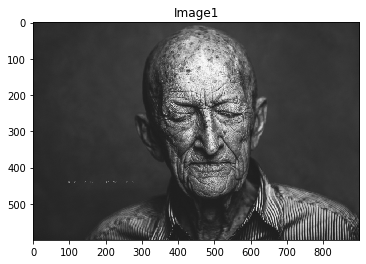

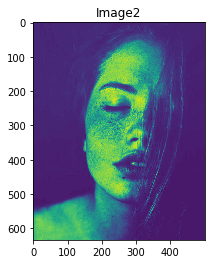

'Image1 : Mouth Close, Image2 : Mouth Open'

In [ ]:
image1_path = "https://www.clickinmoms.com/blog/wp-content/uploads/2014/10/black-and-white-portrait-of-man-with-his-eyes-closed-by-Brian-Powers.jpg"
image2_path = "https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg"

#https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg"

#https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg



classify_images_mouth(image1_path, image2_path, True)

#Milestone 4: Understanding Emotion Detection

##What distinguishes one emotion from another ?

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGK2Z6d7NBBt-cE1OGEAw4fN7KknxBBOGWrQ&usqp=CAU"></img>

<img src="https://cdn.pixabay.com/photo/2017/08/25/21/44/shocked-2681488__340.jpg"></img>

##Exercise (Discussion) | 10 Minutes | Within a student group



*   **What distinguishes Happy Face from Surprised Face?**
*   **What distinguishes Happy Face from Neutral Face?**
*   **What distinguishes Happy Face from Sad Face?**
*   **What distinguishes Happy Face from Angry Face?**



#Finish!